In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('BDataF.csv')
df_test = pd.read_csv('BDataTest.csv')

# Renaming Dummy Columns
df = pd.concat([df, pd.get_dummies(df['DateRose'], prefix='DateRose')], axis=1)
df = pd.concat([df, pd.get_dummies(df['ContestantRace'], prefix='Race')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['DateRose'], prefix='DateRose')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['ContestantRace'], prefix='Race')], axis=1)

BachelorData = df
BachelorTestData = df_test

In [3]:
#feature_cols = ['FirstImpressionRose', 'DateRose', 'OlderthanBachelor', 'YoungerthanBachelor', 'SameAgeasBachelor', 'DateRose_0', 'DateRose_1', 'DateRose_2']

feature_cols = [
                 'FirstImpressionRose',
                 'DateRose',
                 'AbsDistFromBachelorAge',
                 'RelDistFromBachelorAge',
                 'OlderthanBachelor',
                 'YoungerthanBachelor',
                 'SameAgeasBachelor',
                 'SameHairasBachelorette',
                 'DistFromBacheloretteAge',
                 'AbsDistFromBacheloretteAge',
                 'OlderThanBachelorette',
                 'YoungerThanBachelorette',
                 'SameAgeasBachelorette',
                 'SameRaceasBachelorette',
                 'DateRose_0',
                 'DateRose_1',
                 'DateRose_2',
                 'Race_Asian',
                 'Race_Black',
                 'Race_White'
                ]


X = BachelorData[feature_cols]
y = BachelorData['Winner']

In [4]:
# Fitting a classifier model
from sklearn.ensemble import RandomForestClassifier

rf_classification = RandomForestClassifier(n_estimators=100, oob_score=True)
rf_classification.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

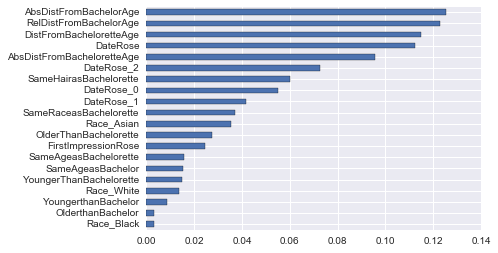

In [12]:
# Plotting Random Forest Classification Model Feature Importance

feature_importance = pd.Series(rf_classification.feature_importances_, index=X.columns)
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh')

C:\Users\ochang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


30 trees
roc: 0.705726600985

50 trees
roc: 0.627339901478

100 trees
roc: 0.734051724138

200 trees
roc: 0.778694581281

500 trees
roc: 0.782266009852

1000 trees
roc: 0.792980295567



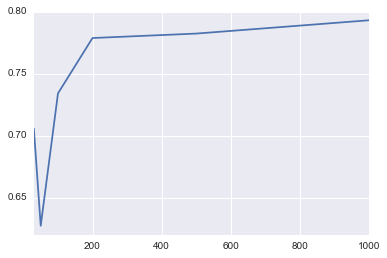

In [6]:
# Finding the optimal number of trees for Random Forest Classifier
from sklearn.cross_validation import cross_val_score

results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    rf_classification = RandomForestClassifier(trees, oob_score=True)
    rf_classification.fit(X, y)
    print trees, "trees"
    scores = cross_val_score(rf_classification, X, y, cv=10, scoring='roc_auc')
    roc = scores.mean()
    print "roc:", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot()

In [7]:
X_new = BachelorTestData[feature_cols]

BachelorTestData['RandomForestClassifierPrediction'] = rf_classification.predict(X_new)

BachelorTestData

,Name,Age,Season,FirstImpressionRose,DateRose,FirstName,LastName,State,AbsDistFromBachelorAge,RelDistFromBachelorAge,...,SameAgeasBachelorette,BacheloretteRace,SameRaceasBachelorette,DateRose_0,DateRose_1,DateRose_2,Race_Asian,Race_Black,Race_White,RandomForestClassifierPrediction
0,Brittany Farrar,26,21,0,0,Brittany,Farrar,California,10,10,...,0,White,1,1.0,0.0,0.0,0.0,0.0,1.0,0
1,Whitney Fransway,25,21,0,0,Whitney,Fransway,Minnesota,11,11,...,1,White,1,1.0,0.0,0.0,0.0,0.0,1.0,0
2,Raven Gates,25,21,0,1,Raven,Gates,Arkansas,11,11,...,1,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0
3,Jasmine Goode,29,21,0,0,Jasmine,Goode,New Jersey,7,7,...,0,White,0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,Vanessa Grimaldi,29,21,0,1,Vanessa,Grimaldi,Canada,7,7,...,0,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0
5,Jaimi King,28,21,0,0,Jaimi,King,Louisiana,8,8,...,0,White,0,1.0,0.0,0.0,0.0,1.0,0.0,0
6,Rachel Lindsay,31,21,1,1,Rachel,Lindsay,Texas,5,5,...,0,White,0,0.0,1.0,0.0,0.0,1.0,0.0,0
7,Astrid Loch,26,21,0,0,Astrid,Loch,Florida,10,10,...,0,White,1,1.0,0.0,0.0,0.0,0.0,1.0,0
8,Danielle Lombard,27,21,0,2,Danielle,Lombard,California,9,9,...,0,White,0,0.0,0.0,1.0,1.0,0.0,0.0,0
9,Danielle Maltby,31,21,0,1,Danielle,Maltby,Wisconsin,5,5,...,0,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0


In [8]:
from sklearn.cross_validation import cross_val_score

rf = RandomForestClassifier(n_estimators = 2000,
                           oob_score = True,
                           n_jobs = -1)

rf.fit(X, y)
scores = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.757266009852


Feature ranking:
1. feature 8 (0.112066)
2. feature 9 (0.109824)
3. feature 2 (0.108485)
4. feature 3 (0.104861)
5. feature 7 (0.066475)
6. feature 1 (0.066267)
7. feature 16 (0.064911)
8. feature 14 (0.063809)
9. feature 13 (0.051595)
10. feature 17 (0.044968)
11. feature 0 (0.043648)
12. feature 15 (0.036197)
13. feature 6 (0.029663)
14. feature 10 (0.026803)
15. feature 12 (0.020775)
16. feature 11 (0.017727)
17. feature 5 (0.013303)
18. feature 19 (0.010674)
19. feature 4 (0.004776)
20. feature 18 (0.003171)


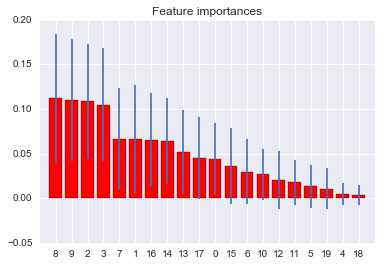

In [10]:
# Using the Extra Trees Classifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])) 
    
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


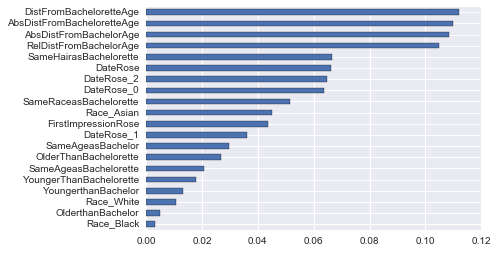

In [13]:
feature_importance = pd.Series(forest.feature_importances_, index=X.columns)
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh')

In [18]:
from sklearn.cross_validation import cross_val_score

ET = ExtraTreesClassifier(n_estimators = 2000,
                           n_jobs = -1)

ET.fit(X, y)
scores = cross_val_score(ET, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.637623152709
